# Preliminary analysis

## import libraries

In [1]:
# !pip install pandas
import pandas as pd
import json
import csv
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## read CSVs to dataframes

In [2]:
# news_media_basic_data

news_media_basic_data = pd.read_csv (r'/Users/katherina/data_science_tweets_neutrality/news_media_twitter_username.csv')
news_media_basic_data.head()

,news_media,twitter_username,us_or_foreign,general_or_political,political_spectrum
0,ABC News,ABC,US,General,Left
1,ABC News,ABCNewsLive,US,General,Left
2,ABC News,ABCPolitics,US,Political,Left
3,BBC News,BBCBreaking,Foreign,General,Middle
4,BBC News,BBCNews,Foreign,General,Middle


In [32]:
# twitter_user_details_data

twitter_user_details_data = pd.read_csv (r'/Users/katherina/data_science_tweets_neutrality/twitter_user_details.csv')
twitter_user_details_data.head()

,user_id,user_name,user_username,user_created_at,user_location,user_protected,user_followers_count,user_following_count,user_tweet_count,user_listed_count,user_verified
0,28785486,ABC News,ABC,2009-04-04 12:40:32+00:00,New York City / Worldwide,False,17644680,486,393230,66112,True
1,384438102,ABC News Live,ABCNewsLive,2011-10-03 17:47:38+00:00,NaN,False,96020,242,36785,2240,True
2,16815644,ABC News Politics,ABCPolitics,2008-10-16 22:43:16+00:00,"Washington, DC",False,1079807,473,192830,8499,True
3,5402612,BBC Breaking News,BBCBreaking,2007-04-22 14:42:37+00:00,"London, UK",False,50727938,3,38184,147742,True
4,612473,BBC News (UK),BBCNews,2007-01-08 08:05:57+00:00,London,False,14276300,93,499300,49372,True


In [4]:
# twitter_combined_tweet_data from 2022/07/01 to 2022/08/18

twitter_combined_tweet_labelled_cleaned_data = pd.read_csv (r'/Users/katherina/data_science_tweets_neutrality/twitter_combined_tweet_labelled_cleaned_data.csv')
twitter_combined_tweet_labelled_cleaned_data.head()

,tweet_id,tweet_text,tweet_author_id,tweet_context_annotations,tweet_created_at,tweet_entities,tweet_in_reply_to_user_id,tweet_lang,tweet_retweet_count,tweet_reply_count,...,tweet_referenced_tweets,tweet_type,tweet_topic_label_us_political_news,contains_abortion_keyword,contains_gun_control_keyword,contains_gay_marriage_keyword,contains_climate_change_keyword,contains_gender_identity_keyword,contains_inflation_keyword,cleaned_tweet_text
0,1543217089145716737,"Pentagon data shows a simple, troubling trend:...",28785486,"[{'domain': {'id': '45', 'name': 'Brand Vertic...",2022-07-02 12:56:40+00:00,"{'urls': [{'start': 154, 'end': 177, 'url': 'h...",NaN,en,185,288,...,NaN,tweet,False,False,False,False,False,False,False,"Pentagon data shows a simple, troubling trend:..."
1,1543211077772759042,Rescue services in Hong Kong say an industrial...,28785486,"[{'domain': {'id': '45', 'name': 'Brand Vertic...",2022-07-02 12:32:47+00:00,"{'urls': [{'start': 162, 'end': 185, 'url': 'h...",NaN,en,22,8,...,NaN,tweet,False,False,False,False,False,False,False,Rescue services in Hong Kong say an industrial...
2,1543205864881983489,In the wake of the Supreme Court’s ruling on R...,28785486,"[{'domain': {'id': '45', 'name': 'Brand Vertic...",2022-07-02 12:12:04+00:00,"{'urls': [{'start': 239, 'end': 262, 'url': 'h...",NaN,en,22,20,...,NaN,tweet,False,True,False,False,False,False,False,In the wake of the Supreme Court’s ruling on R...
3,1543200664024760321,If legislation banning or restricting abortion...,28785486,"[{'domain': {'id': '45', 'name': 'Brand Vertic...",2022-07-02 11:51:24+00:00,"{'urls': [{'start': 166, 'end': 189, 'url': 'h...",NaN,en,49,36,...,NaN,tweet,False,True,False,False,False,False,False,If legislation banning or restricting abortion...
4,1543193997329457157,“We imagined this thing being a fairytale and ...,28785486,"[{'domain': {'id': '10', 'name': 'Person', 'de...",2022-07-02 11:24:54+00:00,"{'urls': [{'start': 172, 'end': 195, 'url': 'h...",NaN,en,11,8,...,NaN,tweet,False,False,False,False,False,False,False,“We imagined this thing being a fairytale and ...


In [5]:
twitter_combined_tweet_labelled_cleaned_data.groupby(['tweet_id']).filter(lambda x: x['tweet_author_id'].count()>1)

,tweet_id,tweet_text,tweet_author_id,tweet_context_annotations,tweet_created_at,tweet_entities,tweet_in_reply_to_user_id,tweet_lang,tweet_retweet_count,tweet_reply_count,...,tweet_referenced_tweets,tweet_type,tweet_topic_label_us_political_news,contains_abortion_keyword,contains_gun_control_keyword,contains_gay_marriage_keyword,contains_climate_change_keyword,contains_gender_identity_keyword,contains_inflation_keyword,cleaned_tweet_text


In [6]:
# tweet_sentiments_score_data

twitter_tweet_sentiments_score_data = pd.read_csv (r'/Users/katherina/data_science_tweets_neutrality/twitter_tweet_sentiments_score_data.csv')
twitter_tweet_sentiments_score_data.head()

,tweet_id,scores_compound,scores_positive,scores_negative,scores_neutral
0,1543217089145716737,-0.7096,0.044,0.210,0.746
1,1543211077772759042,0.5719,0.175,0.067,0.758
2,1543205864881983489,0.3892,0.107,0.052,0.841
3,1543200664024760321,-0.5719,0.000,0.176,0.824
4,1543193997329457157,0.0000,0.000,0.000,1.000


## processing the data

In [7]:
# combine twitter_combined_tweet_data and tweet_sentiments_score
combined_tweet_sentiments_score_df = pd.merge(twitter_combined_tweet_labelled_cleaned_data, twitter_tweet_sentiments_score_data, left_on='tweet_id', right_on='tweet_id', how='left',validate='one_to_one')

# check for duplicates for combined_news_media_tweets_sentiments_score_df
combined_tweet_sentiments_score_df[combined_tweet_sentiments_score_df.duplicated(['tweet_id'], keep=False)]

,tweet_id,tweet_text,tweet_author_id,tweet_context_annotations,tweet_created_at,tweet_entities,tweet_in_reply_to_user_id,tweet_lang,tweet_retweet_count,tweet_reply_count,...,contains_gun_control_keyword,contains_gay_marriage_keyword,contains_climate_change_keyword,contains_gender_identity_keyword,contains_inflation_keyword,cleaned_tweet_text,scores_compound,scores_positive,scores_negative,scores_neutral


In [33]:
twitter_user_details_data.groupby(['user_verified']).count()

,user_id,user_name,user_username,user_created_at,user_location,user_protected,user_followers_count,user_following_count,user_tweet_count,user_listed_count
user_verified,,,,,,,,,,
False,3,3,3,3,2,3,3,3,3,3
True,60,60,60,60,46,60,60,60,60,60


In [36]:
twitter_user_details_data = twitter_user_details_data[twitter_user_details_data['user_verified']==True]
twitter_user_details_data.shape

(60, 11)

In [48]:
twitter_user_details_data.groupby(['user_protected']).count()

,user_id,user_name,user_username,user_created_at,user_location,user_followers_count,user_following_count,user_tweet_count,user_listed_count,user_verified
user_protected,,,,,,,,,,
False,60,60,60,60,46,60,60,60,60,60


In [37]:
# combine combined_tweet_sentiments_score_df and twitter_user_details_data

combined_tweet_sentiments_score_user_df = pd.merge(combined_tweet_sentiments_score_df, twitter_user_details_data, left_on='tweet_author_id', right_on='user_id', how='left',validate='many_to_one')

# combined_news_media_tweets_df = combined_news_media_tweets_df[(~combined_news_media_tweets_df.duplicated(subset=['tweet_id'])) | (combined_news_media_tweets_df['tweet_id'].isnull())]

# check for duplicates for combined_tweet_sentiments_score_user_df
combined_tweet_sentiments_score_user_df[combined_tweet_sentiments_score_user_df.duplicated(['tweet_id'], keep=False)]

,tweet_id,tweet_text,tweet_author_id,tweet_context_annotations,tweet_created_at,tweet_entities,tweet_in_reply_to_user_id,tweet_lang,tweet_retweet_count,tweet_reply_count,...,user_name,user_username,user_created_at,user_location,user_protected,user_followers_count,user_following_count,user_tweet_count,user_listed_count,user_verified


In [38]:
# combine combined_news_media_tweets_sentiments_score_df and news_media_basic_data
combined_news_media_tweets_sentiments_score_news_media_df = pd.merge(combined_tweet_sentiments_score_user_df, news_media_basic_data, left_on='user_username', right_on='twitter_username', how='inner',validate='many_to_one')

# check for duplicates for ccombined_news_media_tweets_sentiments_score_news_media_df
combined_news_media_tweets_sentiments_score_news_media_df[combined_news_media_tweets_sentiments_score_news_media_df.duplicated(['tweet_id'], keep=False)]

,tweet_id,tweet_text,tweet_author_id,tweet_context_annotations,tweet_created_at,tweet_entities,tweet_in_reply_to_user_id,tweet_lang,tweet_retweet_count,tweet_reply_count,...,user_followers_count,user_following_count,user_tweet_count,user_listed_count,user_verified,news_media,twitter_username,us_or_foreign,general_or_political,political_spectrum


In [39]:
# add column tweet_created_at_date

combined_news_media_tweets_sentiments_score_news_media_df['tweet_created_at_date'] = pd.to_datetime(combined_news_media_tweets_sentiments_score_news_media_df['tweet_created_at']).apply(lambda x: x.date())
combined_news_media_tweets_sentiments_score_news_media_df.head()

,tweet_id,tweet_text,tweet_author_id,tweet_context_annotations,tweet_created_at,tweet_entities,tweet_in_reply_to_user_id,tweet_lang,tweet_retweet_count,tweet_reply_count,...,user_following_count,user_tweet_count,user_listed_count,user_verified,news_media,twitter_username,us_or_foreign,general_or_political,political_spectrum,tweet_created_at_date
0,1543217089145716737,"Pentagon data shows a simple, troubling trend:...",28785486,"[{'domain': {'id': '45', 'name': 'Brand Vertic...",2022-07-02 12:56:40+00:00,"{'urls': [{'start': 154, 'end': 177, 'url': 'h...",NaN,en,185,288,...,486.0,393230.0,66112.0,True,ABC News,ABC,US,General,Left,2022-07-02
1,1543211077772759042,Rescue services in Hong Kong say an industrial...,28785486,"[{'domain': {'id': '45', 'name': 'Brand Vertic...",2022-07-02 12:32:47+00:00,"{'urls': [{'start': 162, 'end': 185, 'url': 'h...",NaN,en,22,8,...,486.0,393230.0,66112.0,True,ABC News,ABC,US,General,Left,2022-07-02
2,1543205864881983489,In the wake of the Supreme Court’s ruling on R...,28785486,"[{'domain': {'id': '45', 'name': 'Brand Vertic...",2022-07-02 12:12:04+00:00,"{'urls': [{'start': 239, 'end': 262, 'url': 'h...",NaN,en,22,20,...,486.0,393230.0,66112.0,True,ABC News,ABC,US,General,Left,2022-07-02
3,1543200664024760321,If legislation banning or restricting abortion...,28785486,"[{'domain': {'id': '45', 'name': 'Brand Vertic...",2022-07-02 11:51:24+00:00,"{'urls': [{'start': 166, 'end': 189, 'url': 'h...",NaN,en,49,36,...,486.0,393230.0,66112.0,True,ABC News,ABC,US,General,Left,2022-07-02
4,1543193997329457157,“We imagined this thing being a fairytale and ...,28785486,"[{'domain': {'id': '10', 'name': 'Person', 'de...",2022-07-02 11:24:54+00:00,"{'urls': [{'start': 172, 'end': 195, 'url': 'h...",NaN,en,11,8,...,486.0,393230.0,66112.0,True,ABC News,ABC,US,General,Left,2022-07-02


In [40]:
twitter_combined_tweet_labelled_cleaned_data.shape

(158515, 22)

In [41]:
combined_tweet_sentiments_score_df.shape

(158515, 26)

In [42]:
combined_news_media_tweets_sentiments_score_news_media_df.shape

(156230, 43)

In [43]:
combined_news_media_tweets_sentiments_score_news_media_df.isnull().sum()

tweet_id                                    0
tweet_text                                  0
tweet_author_id                             0
tweet_context_annotations                   0
tweet_created_at                            0
tweet_entities                            178
tweet_in_reply_to_user_id              151644
tweet_lang                                  0
tweet_retweet_count                         0
tweet_reply_count                           0
tweet_like_count                            0
tweet_quote_count                           0
tweet_referenced_tweets                138887
tweet_type                                  0
tweet_topic_label_us_political_news         0
contains_abortion_keyword                   0
contains_gun_control_keyword                0
contains_gay_marriage_keyword               0
contains_climate_change_keyword             0
contains_gender_identity_keyword            0
contains_inflation_keyword                  0
cleaned_tweet_text                

In [44]:
combined_data = combined_news_media_tweets_sentiments_score_news_media_df

In [45]:
combined_data['news_media'].nunique()

39

In [46]:
combined_data['user_username'].nunique()

59

In [47]:
combined_data.groupby(['tweet_type'])['tweet_type'].count()

tweet_type
reply        4586
retweet     12780
tweet      138864
Name: tweet_type, dtype: int64

## analyse combined data

In [82]:
combined_news_media_tweets_per_day_piv = combined_data.pivot_table(index=['tweet_created_at_date'], columns='user_name', 
values='tweet_id', aggfunc='nunique', fill_value=0)
combined_news_media_tweets_per_day_piv

user_name,ABC News,ABC News Live,ABC News Politics,BBC Breaking News,BBC News (UK),BBC News (World),BBC North America,Bloomberg,Bloomberg Politics,CBS News,...,The New York Times,The New Yorker,The Wall Street Journal,The Washington Post,The Washington Times,TheBlaze,USA TODAY,USA TODAY Politics,Vox,Washington Examiner
tweet_created_at_date,,,,,,,,,,,,,,,,,,,,,
2022-07-01,76,19,3,2,90,48,5,0,0,0,...,0,43,0,0,0,49,77,27,24,0
2022-07-02,63,3,2,0,56,28,2,0,0,0,...,0,41,27,0,0,18,36,8,16,0
2022-07-03,70,0,36,2,70,25,1,0,0,0,...,0,34,86,0,0,5,44,6,6,0
2022-07-04,78,37,21,5,100,60,3,0,0,0,...,0,47,94,0,0,21,38,13,5,0
2022-07-05,80,17,41,6,114,50,7,0,121,0,...,0,37,96,0,0,41,78,15,4,0
2022-07-06,93,20,44,4,125,42,4,0,158,0,...,59,35,102,0,0,63,72,18,26,0
2022-07-07,87,22,47,6,111,58,8,0,146,105,...,116,34,96,0,0,53,76,23,24,0
2022-07-08,106,14,19,5,90,48,7,0,135,128,...,107,34,96,12,0,64,78,18,18,0
2022-07-09,78,3,0,2,53,22,2,0,43,62,...,96,37,86,58,0,29,38,8,3,0


In [120]:
# count total tweet and tweeted date per news media
analysis_df = combined_data.groupby(['user_id',
                                     'user_name',
                                     'user_followers_count',
                                     'user_following_count',
                                     'news_media',
                                     'us_or_foreign',
                                     'general_or_political',
                                     'political_spectrum',
                                    ])[['tweet_id','tweet_created_at_date']].nunique().add_prefix('count_total_').reset_index()

# calculate average tweet per day
analysis_df['average_total_tweet_per_day'] = round(analysis_df['count_total_tweet_id']/analysis_df['count_total_tweet_created_at_date'],2)

analysis_df.head(60)

,user_id,user_name,user_followers_count,user_following_count,news_media,us_or_foreign,general_or_political,political_spectrum,count_total_tweet_id,count_total_tweet_created_at_date,average_total_tweet_per_day
0,4.283330e+05,CNN Breaking News,63662926.0,121.0,CNN,US,General,Left,249,48,5.19
1,6.124730e+05,BBC News (UK),14276300.0,93.0,BBC News,Foreign,General,Middle,3798,49,77.51
2,7.421430e+05,BBC News (World),37774379.0,18.0,BBC News,Foreign,General,Middle,2094,49,42.73
3,7.592510e+05,CNN,59357266.0,1103.0,CNN,US,General,Left,3898,49,79.55
4,7.885240e+05,Guardian news,3802981.0,1225.0,The Guardian,Foreign,General,Left,4144,35,118.40
5,8.070950e+05,The New York Times,53885565.0,892.0,New York Times,US,General,Left,4547,44,103.34
6,1.367531e+06,Fox News,22228143.0,262.0,Fox News,US,General,Right,5952,26,228.92
7,1.652541e+06,Reuters,25471928.0,1236.0,Reuters,Foreign,General,Middle,5887,14,420.50
8,1.917731e+06,The Hill,4436643.0,305.0,The Hill,US,Political,Middle,5784,18,321.33
9,2.467791e+06,The Washington Post,19648090.0,1716.0,Washington Post,US,General,Left,4589,42,109.26


In [109]:
pivot_tweet_type = combined_data.pivot_table(index=['user_id'], columns='tweet_type', 
values='tweet_id', aggfunc='nunique', fill_value=0)

pivot_tweet_type.rename(
    columns={'reply':'count_reply',
             'retweet':'count_retweet',
             'tweet':'count_tweet'
            }
          ,inplace=True)

pivot_tweet_type.head()

tweet_type,count_reply,count_retweet,count_tweet
user_id,,,
428333.0,1,11,237
612473.0,2,376,3420
742143.0,2,106,1986
759251.0,18,25,3855
788524.0,0,0,4144


In [110]:
user_overall_avg_sentiments_score = combined_data.groupby('user_id')[['scores_compound']].mean().reset_index().rename(columns={'scores_compound': 'overall_avg_scores_compound'})
user_overall_avg_sentiments_score.head()

,user_id,overall_avg_scores_compound
0,428333.0,-0.203904
1,612473.0,-0.104082
2,742143.0,-0.164427
3,759251.0,-0.061789
4,788524.0,-0.115037


In [136]:
# count tweet and average sentiments_score for tweet contains_abortion_keyword

user_contains_abortion_keyword_tweet = combined_data[(combined_data['contains_abortion_keyword']==True) &
                                                     (combined_data['tweet_type']=='tweet')].groupby('user_id').agg({'tweet_id':'count',
                                                                                                                     'scores_compound':'mean'}).rename(columns={'tweet_id':'tweet_ct_abortion_keyword',
                                                                                                                     'scores_compound':'tweet_ct_abortion_keyword_avg_scores_compound'})
        
user_contains_abortion_keyword_tweet.head()

# user_contains_abortion_keyword_avg_sentiments_score = combined_data[combined_data['contains_abortion_keyword']==True].groupby('user_id')[['scores_compound',
#                                                                   'scores_positive',
#                                                                   'scores_negative',
#                                                                   'scores_neutral']].mean().reset_index().rename(columns={'scores_compound': 'ct_abortion_avg_scores_compound',
#                                                                                                                           'scores_positive': 'ct_abortion_avg_scores_negative',
#                                                                                                                           'scores_negative': 'ct_abortion_avg_scores_negative',
#                                                                                                                           'scores_neutral': 'ct_abortion_avg_scores_neutral'
#                                                                                                                          })
# user_contains_abortion_keyword_avg_sentiments_score.head()

,tweet_ct_abortion_keyword,tweet_ct_abortion_keyword_avg_scores_compound
user_id,,
428333.0,6,0.160467
612473.0,16,-0.087406
742143.0,28,-0.135582
759251.0,122,-0.016137
788524.0,44,-0.061918


In [112]:
# count tweet and average sentiments_score for tweet contains_gun_control_keyword

user_contains_gun_control_keyword_tweet = combined_data[combined_data['contains_gun_control_keyword']==True].groupby('user_id').agg({'tweet_id':'count',
                                                                                                                                                    'scores_compound':'mean'}).rename(columns={'tweet_id':'tweet_ct_gun_control_keyword',
                                                                                                                                                    'scores_compound':'tweet_ct_gun_control_keyword_avg_scores_compound'})
        
user_contains_gun_control_keyword_tweet.head()

,tweet_ct_gun_control_keyword,tweet_ct_gun_control_keyword_avg_scores_compound
user_id,,
428333.0,12,-0.425492
612473.0,49,-0.159188
742143.0,46,-0.369985
759251.0,147,-0.295027
788524.0,52,-0.266715


In [137]:
# count tweet and average sentiments_score for tweet contains_gay_marriage_keyword

user_contains_gay_marriage_keyword_tweet = combined_data[(combined_data['contains_gay_marriage_keyword']==True) &
                                                         (combined_data['tweet_type']=='tweet')].groupby('user_id').agg({'tweet_id':'count',
                                                                                                                         'scores_compound':'mean'}).rename(columns={'tweet_id':'tweet_ct_gay_marriage_keyword',
                                                                                                                         'scores_compound':'tweet_ct_gay_marriage_keyword_avg_scores_compound'})
        
user_contains_gay_marriage_keyword_tweet.head()

# user_contains_gay_marriage_keyword_avg_sentiments_score = combined_data[combined_data['contains_gay_marriage_keyword']==True].groupby('user_id')[['scores_compound',
#                                                                   'scores_positive',
#                                                                   'scores_negative',
#                                                                   'scores_neutral']].mean().reset_index().rename(columns={'scores_compound': 'ct_gay_marriage_avg_scores_compound',
#                                                                                                                           'scores_positive': 'ct_gay_marriage_avg_scores_negative',
#                                                                                                                           'scores_negative': 'ct_gay_marriage_avg_scores_negative',
#                                                                                                                           'scores_neutral': 'ct_gay_marriage_avg_scores_neutral'
#                                                                                                                          })
# user_contains_gay_marriage_keyword_avg_sentiments_score.head()

,tweet_ct_gay_marriage_keyword,tweet_ct_gay_marriage_keyword_avg_scores_compound
user_id,,
428333.0,1,-0.416800
612473.0,2,0.360050
742143.0,7,0.039943
759251.0,13,0.051831
788524.0,7,0.117457


In [138]:
# count tweet and average sentiments_score for tweet contains_climate_change_keyword

user_contains_climate_change_keyword_tweet = combined_data[(combined_data['contains_climate_change_keyword']==True) &
                                                           (combined_data['tweet_type']=='tweet')].groupby('user_id').agg({'tweet_id':'count',
                                                                                                                           'scores_compound':'mean'}).rename(columns={'tweet_id':'tweet_ct_climate_change_keyword',
                                                                                                                           'scores_compound':'tweet_ct_climate_change_keyword_avg_scores_compound'})
        
user_contains_climate_change_keyword_tweet.head()

# user_contains_climate_change_keyword_avg_sentiments_score = combined_data[combined_data['contains_climate_change_keyword']==True].groupby('user_id')[['scores_compound',
#                                                                   'scores_positive',
#                                                                   'scores_negative',
#                                                                   'scores_neutral']].mean().reset_index().rename(columns={'scores_compound': 'ct_climate_change_avg_scores_compound',
#                                                                                                                           'scores_positive': 'ct_climate_change_avg_scores_negative',
#                                                                                                                           'scores_negative': 'ct_climate_change_avg_scores_negative',
#                                                                                                                           'scores_neutral': 'ct_climate_change_avg_scores_neutral'
#                                                                                                                          })
# user_contains_climate_change_keyword_avg_sentiments_score.head()

,tweet_ct_climate_change_keyword,tweet_ct_climate_change_keyword_avg_scores_compound
user_id,,
428333.0,11,0.063764
612473.0,109,-0.090005
742143.0,75,-0.153715
759251.0,224,-0.062363
788524.0,201,-0.141294


In [139]:
# count tweet and average sentiments_score for tweet contains_gender_identity_keyword

user_contains_gender_identity_keyword_tweet = combined_data[(combined_data['contains_gender_identity_keyword']==True) &
                                                            (combined_data['tweet_type']=='tweet')].groupby('user_id').agg({'tweet_id':'count',
                                                                                                                            'scores_compound':'mean'}).rename(columns={'tweet_id':'tweet_ct_gender_identity_keyword',
                                                                                                                            'scores_compound':'tweet_ct_gender_identity_keyword_avg_scores_compound'})
        
user_contains_gender_identity_keyword_tweet.head()

# user_contains_gender_identity_keyword_avg_sentiments_score = combined_data[combined_data['contains_gender_identity_keyword']==True].groupby('user_id')[['scores_compound',
#                                                                   'scores_positive',
#                                                                   'scores_negative',
#                                                                   'scores_neutral']].mean().reset_index().rename(columns={'scores_compound': 'ct_gender_identity_avg_scores_compound',
#                                                                                                                           'scores_positive': 'ct_gender_identity_avg_scores_negative',
#                                                                                                                           'scores_negative': 'ct_gender_identity_avg_scores_negative',
#                                                                                                                           'scores_neutral': 'ct_gender_identity_avg_scores_neutral'
#                                                                                                                          })
# user_contains_gender_identity_keyword_avg_sentiments_score.head()

,tweet_ct_gender_identity_keyword,tweet_ct_gender_identity_keyword_avg_scores_compound
user_id,,
612473.0,32,0.005134
742143.0,24,0.100846
759251.0,68,-0.067666
788524.0,24,0.065238
807095.0,89,-0.037404


In [140]:
# count tweet and average sentiments_score for tweet contains_inflation_keyword

user_contains_inflation_keyword_tweet = combined_data[(combined_data['contains_inflation_keyword']==True) &
                                                      (combined_data['tweet_type']=='tweet')].groupby('user_id').agg({'tweet_id':'count',
                                                                                                                      'scores_compound':'mean'}).rename(columns={'tweet_id':'tweet_ct_inflation_keyword',
                                                                                                                      'scores_compound':'tweet_ct_inflation_keyword_avg_scores_compound'})
        
user_contains_inflation_keyword_tweet.head()

# user_contains_inflation_keyword_avg_sentiments_score = combined_data[combined_data['contains_inflation_keyword']==True].groupby('user_id')[['scores_compound',
#                                                                   'scores_positive',
#                                                                   'scores_negative',
#                                                                   'scores_neutral']].mean().reset_index().rename(columns={'scores_compound': 'ct_inflation_avg_scores_compound',
#                                                                                                                           'scores_positive': 'ct_inflation_avg_scores_negative',
#                                                                                                                           'scores_negative': 'ct_inflation_avg_scores_negative',
#                                                                                                                           'scores_neutral': 'ct_inflation_avg_scores_neutral'
#                                                                                                                          })
# user_contains_inflation_keyword_avg_sentiments_score.head()

,tweet_ct_inflation_keyword,tweet_ct_inflation_keyword_avg_scores_compound
user_id,,
428333.0,6,0.121800
612473.0,95,-0.092747
742143.0,14,-0.118336
759251.0,80,-0.073179
788524.0,127,-0.120161


In [146]:
combined_analysis_df = None

combined_analysis_df = pd.merge(analysis_df, pivot_tweet_type, left_on='user_id', right_on='user_id', how='left',validate='one_to_one')

combined_analysis_df = pd.merge(combined_analysis_df, user_overall_avg_sentiments_score, left_on='user_id', right_on='user_id', how='left',validate='one_to_one')

combined_analysis_df = pd.merge(combined_analysis_df, user_contains_abortion_keyword_tweet, left_on='user_id', right_on='user_id', how='left',validate='one_to_one')

combined_analysis_df = pd.merge(combined_analysis_df, user_contains_gun_control_keyword_tweet, left_on='user_id', right_on='user_id', how='left',validate='one_to_one')

combined_analysis_df = pd.merge(combined_analysis_df, user_contains_gay_marriage_keyword_tweet, left_on='user_id', right_on='user_id', how='left',validate='one_to_one')

combined_analysis_df = pd.merge(combined_analysis_df, user_contains_climate_change_keyword_tweet, left_on='user_id', right_on='user_id', how='left',validate='one_to_one')

combined_analysis_df = pd.merge(combined_analysis_df, user_contains_gender_identity_keyword_tweet, left_on='user_id', right_on='user_id', how='left',validate='one_to_one')

combined_analysis_df = pd.merge(combined_analysis_df, user_contains_inflation_keyword_tweet, left_on='user_id', right_on='user_id', how='left',validate='one_to_one')

combined_analysis_df = combined_analysis_df.fillna(0)

combined_analysis_df.head(60)

,user_id,user_name,user_followers_count,user_following_count,news_media,us_or_foreign,general_or_political,political_spectrum,count_total_tweet_id,count_total_tweet_created_at_date,...,tweet_ct_gun_control_keyword,tweet_ct_gun_control_keyword_avg_scores_compound,tweet_ct_gay_marriage_keyword,tweet_ct_gay_marriage_keyword_avg_scores_compound,tweet_ct_climate_change_keyword,tweet_ct_climate_change_keyword_avg_scores_compound,tweet_ct_gender_identity_keyword,tweet_ct_gender_identity_keyword_avg_scores_compound,tweet_ct_inflation_keyword,tweet_ct_inflation_keyword_avg_scores_compound
0,4.283330e+05,CNN Breaking News,63662926.0,121.0,CNN,US,General,Left,249,48,...,12.0,-0.425492,1.0,-0.416800,11.0,0.063764,0.0,0.000000,6.0,0.121800
1,6.124730e+05,BBC News (UK),14276300.0,93.0,BBC News,Foreign,General,Middle,3798,49,...,49.0,-0.159188,2.0,0.360050,109.0,-0.090005,32.0,0.005134,95.0,-0.092747
2,7.421430e+05,BBC News (World),37774379.0,18.0,BBC News,Foreign,General,Middle,2094,49,...,46.0,-0.369985,7.0,0.039943,75.0,-0.153715,24.0,0.100846,14.0,-0.118336
3,7.592510e+05,CNN,59357266.0,1103.0,CNN,US,General,Left,3898,49,...,147.0,-0.295027,13.0,0.051831,224.0,-0.062363,68.0,-0.067666,80.0,-0.073179
4,7.885240e+05,Guardian news,3802981.0,1225.0,The Guardian,Foreign,General,Left,4144,35,...,52.0,-0.266715,7.0,0.117457,201.0,-0.141294,24.0,0.065238,127.0,-0.120161
5,8.070950e+05,The New York Times,53885565.0,892.0,New York Times,US,General,Left,4547,44,...,195.0,-0.305669,5.0,0.175660,295.0,-0.007585,89.0,-0.037404,95.0,-0.038103
6,1.367531e+06,Fox News,22228143.0,262.0,Fox News,US,General,Right,5952,26,...,175.0,-0.276964,5.0,-0.153280,252.0,-0.131094,86.0,-0.087031,210.0,-0.195055
7,1.652541e+06,Reuters,25471928.0,1236.0,Reuters,Foreign,General,Middle,5887,14,...,87.0,-0.209803,0.0,0.000000,411.0,0.022151,95.0,0.163279,305.0,-0.015940
8,1.917731e+06,The Hill,4436643.0,305.0,The Hill,US,Political,Middle,5784,18,...,130.0,-0.297014,1.0,0.000000,288.0,0.062750,116.0,0.001753,306.0,0.101574
9,2.467791e+06,The Washington Post,19648090.0,1716.0,Washington Post,US,General,Left,4589,42,...,162.0,-0.304211,18.0,0.387222,237.0,-0.056931,71.0,-0.021852,104.0,-0.067804


In [147]:
# calculate average total tweet per day
combined_analysis_df['average_total_tweet_per_day'] = round(combined_analysis_df['count_total_tweet_id']/combined_analysis_df['count_total_tweet_created_at_date'],2)

# calculate average tweet per day
combined_analysis_df['average_tweet_per_day'] = round(combined_analysis_df['count_tweet']/combined_analysis_df['count_total_tweet_created_at_date'],2)

# calculate average retweet per day
combined_analysis_df['average_retweet_per_day'] = round(combined_analysis_df['count_retweet']/combined_analysis_df['count_total_tweet_created_at_date'],2)

# calculate average reply per day
combined_analysis_df['average_reply_per_day'] = round(combined_analysis_df['count_reply']/combined_analysis_df['count_total_tweet_created_at_date'],2)

combined_analysis_df.head()

,user_id,user_name,user_followers_count,user_following_count,news_media,us_or_foreign,general_or_political,political_spectrum,count_total_tweet_id,count_total_tweet_created_at_date,...,tweet_ct_gay_marriage_keyword_avg_scores_compound,tweet_ct_climate_change_keyword,tweet_ct_climate_change_keyword_avg_scores_compound,tweet_ct_gender_identity_keyword,tweet_ct_gender_identity_keyword_avg_scores_compound,tweet_ct_inflation_keyword,tweet_ct_inflation_keyword_avg_scores_compound,average_tweet_per_day,average_retweet_per_day,average_reply_per_day
0,428333.0,CNN Breaking News,63662926.0,121.0,CNN,US,General,Left,249,48,...,-0.416800,11.0,0.063764,0.0,0.000000,6.0,0.121800,4.94,0.23,0.02
1,612473.0,BBC News (UK),14276300.0,93.0,BBC News,Foreign,General,Middle,3798,49,...,0.360050,109.0,-0.090005,32.0,0.005134,95.0,-0.092747,69.80,7.67,0.04
2,742143.0,BBC News (World),37774379.0,18.0,BBC News,Foreign,General,Middle,2094,49,...,0.039943,75.0,-0.153715,24.0,0.100846,14.0,-0.118336,40.53,2.16,0.04
3,759251.0,CNN,59357266.0,1103.0,CNN,US,General,Left,3898,49,...,0.051831,224.0,-0.062363,68.0,-0.067666,80.0,-0.073179,78.67,0.51,0.37
4,788524.0,Guardian news,3802981.0,1225.0,The Guardian,Foreign,General,Left,4144,35,...,0.117457,201.0,-0.141294,24.0,0.065238,127.0,-0.120161,118.40,0.00,0.00


In [200]:
# calculate perentage of tweet_ct_abortion_keyword
combined_analysis_df['tweet_ct_abortion_keyword_percentage'] = round(combined_analysis_df['tweet_ct_abortion_keyword']/combined_analysis_df['count_tweet'],2)

# calculate perentage of tweet_ct_gun_control_keyword
combined_analysis_df['tweet_ct_gun_control_keyword_percentage'] = round(combined_analysis_df['tweet_ct_gun_control_keyword']/combined_analysis_df['count_tweet'],2)

# calculate perentage of tweet_ct_gay_marriage_keyword
combined_analysis_df['tweet_ct_gay_marriage_keyword_percentage'] = round(combined_analysis_df['tweet_ct_gay_marriage_keyword']/combined_analysis_df['count_tweet'],2)

# calculate perentage of tweet_ct_climate_change_keyword
combined_analysis_df['tweet_ct_climate_change_keyword_percentage'] = round(combined_analysis_df['tweet_ct_climate_change_keyword']/combined_analysis_df['count_tweet'],2)

# calculate perentage of tweet_ct_gender_identity_keyword
combined_analysis_df['tweet_ct_gender_identity_keyword_percentage'] = round(combined_analysis_df['tweet_ct_gender_identity_keyword']/combined_analysis_df['count_tweet'],2)

# calculate perentage of tweet_ct_inflation_keyword
combined_analysis_df['tweet_ct_inflation_keyword_percentage'] = round(combined_analysis_df['tweet_ct_inflation_keyword']/combined_analysis_df['count_tweet'],2)

combined_analysis_df.head()

,user_id,user_name,user_followers_count,user_following_count,news_media,us_or_foreign,general_or_political,political_spectrum,count_total_tweet_id,count_total_tweet_created_at_date,...,tweet_ct_inflation_keyword_avg_scores_compound,average_tweet_per_day,average_retweet_per_day,average_reply_per_day,tweet_ct_abortion_keyword_percentage,tweet_ct_gun_control_keyword_percentage,tweet_ct_gay_marriage_keyword_percentage,tweet_ct_climate_change_keyword_percentage,tweet_ct_gender_identity_keyword_percentage,tweet_ct_inflation_keyword_percentage
0,428333.0,CNN Breaking News,63662926.0,121.0,CNN,US,General,Left,249,48,...,0.121800,4.94,0.23,0.02,0.03,0.05,0.0,0.05,0.00,0.03
1,612473.0,BBC News (UK),14276300.0,93.0,BBC News,Foreign,General,Middle,3798,49,...,-0.092747,69.80,7.67,0.04,0.00,0.01,0.0,0.03,0.01,0.03
2,742143.0,BBC News (World),37774379.0,18.0,BBC News,Foreign,General,Middle,2094,49,...,-0.118336,40.53,2.16,0.04,0.01,0.02,0.0,0.04,0.01,0.01
3,759251.0,CNN,59357266.0,1103.0,CNN,US,General,Left,3898,49,...,-0.073179,78.67,0.51,0.37,0.03,0.04,0.0,0.06,0.02,0.02
4,788524.0,Guardian news,3802981.0,1225.0,The Guardian,Foreign,General,Left,4144,35,...,-0.120161,118.40,0.00,0.00,0.01,0.01,0.0,0.05,0.01,0.03


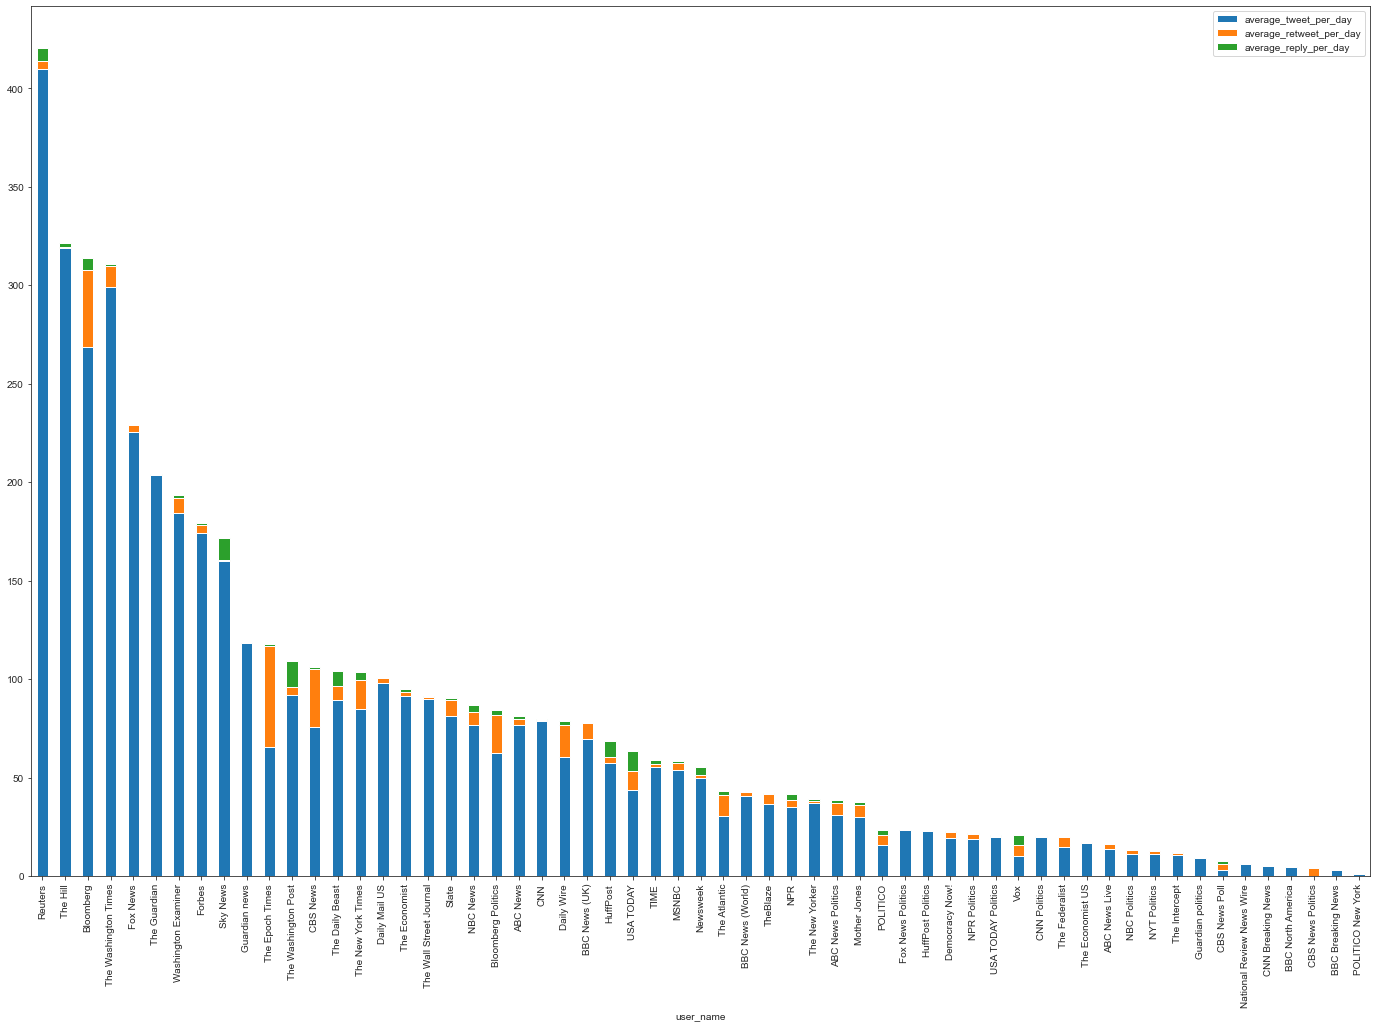

In [179]:
ax = combined_analysis_df.sort_values('average_total_tweet_per_day', ascending=False).plot.bar(
    x='user_name', 
    y=['average_tweet_per_day','average_retweet_per_day','average_reply_per_day'], 
    rot=90, 
    stacked=True, 
    figsize=(24,16))

In [ ]:
# visualisation

<AxesSubplot:xlabel='political_spectrum', ylabel='overall_avg_scores_compound'>

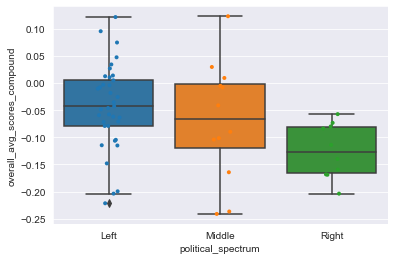

In [180]:
# overall_avg_scores_compound by political_spectrum

sns.set_style("darkgrid")

sns.boxplot(x="political_spectrum", y="overall_avg_scores_compound", data=combined_analysis_df)
sns.stripplot(x="political_spectrum", y="overall_avg_scores_compound", data=combined_analysis_df,
              size=4, jitter=True, edgecolor="gray")

Text(0.5, 0.98, 'Avg Sentiment Scores Compound by Political Spectrum for Keywords')

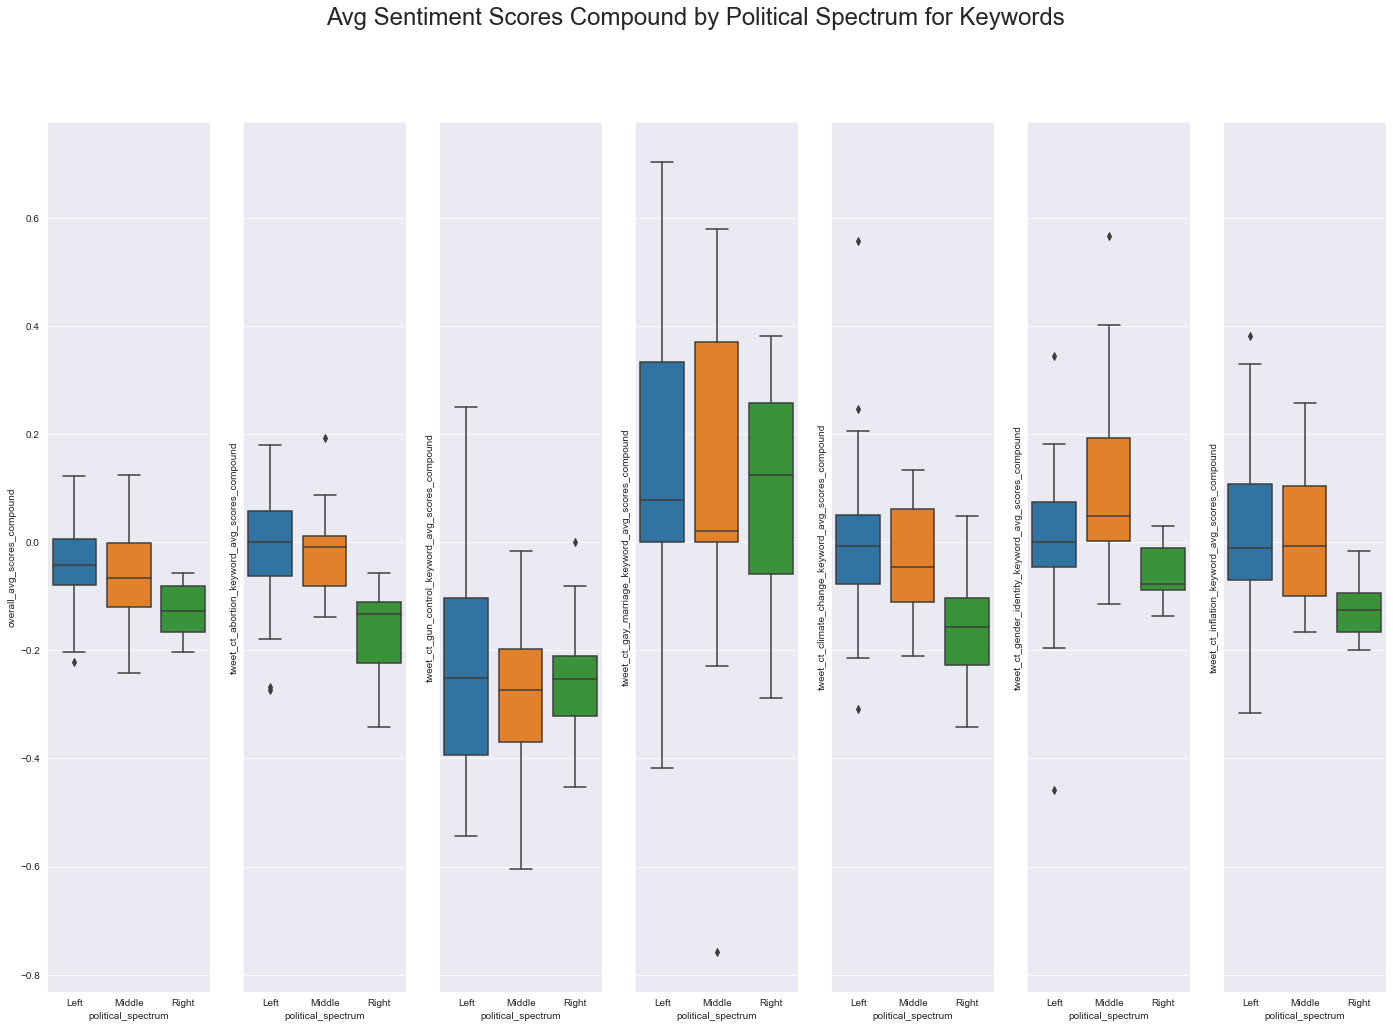

In [199]:
fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(24,16), sharex=True, sharey=True)

# plt.setp(ax.get_xticklabels(), fontsize=20)
# ax.tick_params(axis='x', labelsize=20)

sns.boxplot(x="political_spectrum", 
            y="overall_avg_scores_compound", 
            data=combined_analysis_df, 
            orient='v', 
            ax=axes[0])
# sns.stripplot(x="political_spectrum", y="overall_avg_scores_compound", data=combined_analysis_df,
#               size=4, jitter=True, edgecolor="gray")

sns.boxplot(x="political_spectrum", 
            y="tweet_ct_abortion_keyword_avg_scores_compound", 
            data=combined_analysis_df,  
            orient='v', 
            ax=axes[1])

sns.boxplot(x="political_spectrum", 
            y="tweet_ct_gun_control_keyword_avg_scores_compound", 
            data=combined_analysis_df,  
            orient='v', 
            ax=axes[2])

sns.boxplot(x="political_spectrum", 
            y="tweet_ct_gay_marriage_keyword_avg_scores_compound", 
            data=combined_analysis_df,  
            orient='v', 
            ax=axes[3])

sns.boxplot(x="political_spectrum", 
            y="tweet_ct_climate_change_keyword_avg_scores_compound", 
            data=combined_analysis_df,  
            orient='v', 
            ax=axes[4])

sns.boxplot(x="political_spectrum", 
            y="tweet_ct_gender_identity_keyword_avg_scores_compound", 
            data=combined_analysis_df,  
            orient='v', 
            ax=axes[5])

sns.boxplot(x="political_spectrum", 
            y="tweet_ct_inflation_keyword_avg_scores_compound", 
            data=combined_analysis_df,  
            orient='v', 
            ax=axes[6])

fig.suptitle('Avg Sentiment Scores Compound by Political Spectrum for Keywords', fontsize=24)

Text(0.5, 0.98, 'Percentage of Tweet Contains Keywords by Political Spectrum')

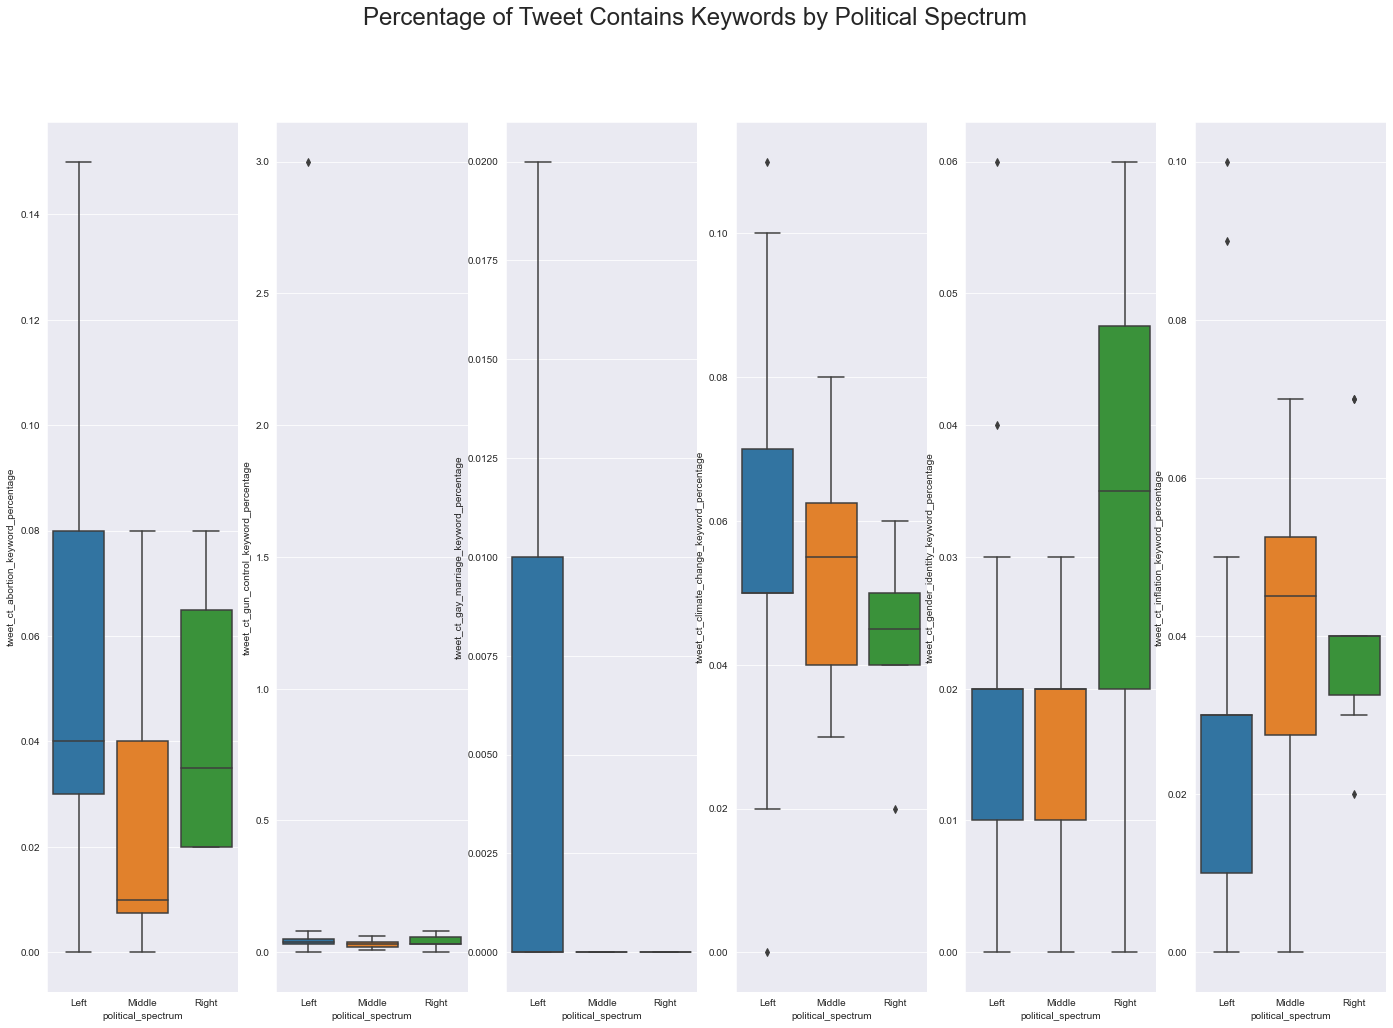

In [202]:
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(24,16))

sns.boxplot(x="political_spectrum", 
            y="tweet_ct_abortion_keyword_percentage", 
            data=combined_analysis_df, 
            orient='v', 
            ax=axes[0])

sns.boxplot(x="political_spectrum", 
            y="tweet_ct_gun_control_keyword_percentage", 
            data=combined_analysis_df,  
            orient='v', 
            ax=axes[1])

sns.boxplot(x="political_spectrum", 
            y="tweet_ct_gay_marriage_keyword_percentage", 
            data=combined_analysis_df,  
            orient='v', 
            ax=axes[2])

sns.boxplot(x="political_spectrum", 
            y="tweet_ct_climate_change_keyword_percentage", 
            data=combined_analysis_df,  
            orient='v', 
            ax=axes[3])

sns.boxplot(x="political_spectrum", 
            y="tweet_ct_gender_identity_keyword_percentage", 
            data=combined_analysis_df,  
            orient='v', 
            ax=axes[4])

sns.boxplot(x="political_spectrum", 
            y="tweet_ct_inflation_keyword_percentage", 
            data=combined_analysis_df,  
            orient='v', 
            ax=axes[5])

fig.suptitle('Percentage of Tweet Contains Keywords by Political Spectrum', fontsize=24)